In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sys import getsizeof
import numpy as np

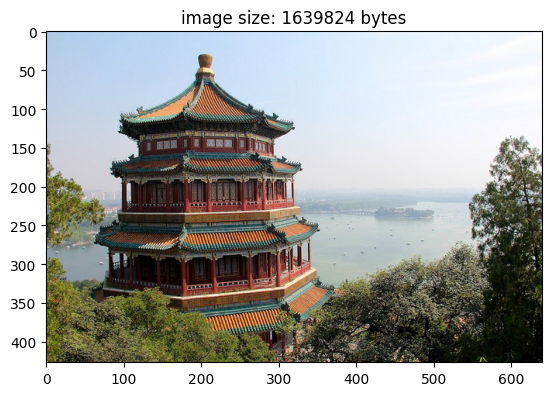

In [80]:
image = (255 * plt.imread('china-original.png')).astype('int16')
shape = image.shape
plt.title(f'image size: {getsizeof(image)} bytes')
plt.imshow(image)

In [81]:
limage = image.reshape((-1,3))

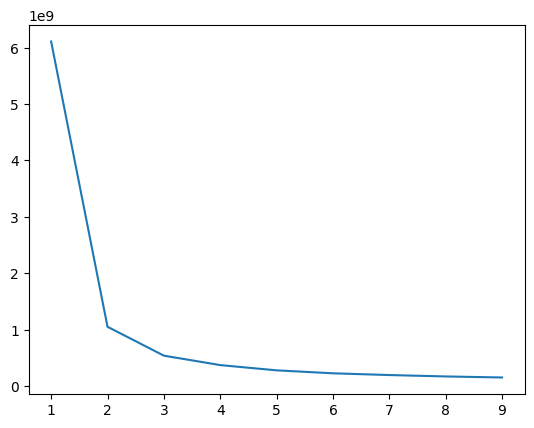

In [82]:
plt.plot(list(range(1,10)),[KMeans(i, n_init='auto').fit(limage).inertia_ for i in range(1, 10)])

In [162]:
kmeans = KMeans(3,n_init='auto').fit(limage)
cluster_centers = kmeans.cluster_centers_.astype('int16')
labels = np.array(kmeans.labels_)
# predictions = cluster_centers[kmeans.labels_]
predictions = np.zeros(labels.shape + (3,),dtype='int16')
predictions[np.argwhere([labels == 0])[:,1]] = cluster_centers[0]
predictions[np.argwhere([labels == 1])[:,1]] = cluster_centers[1]
predictions[np.argwhere([labels == 2])[:,1]] = cluster_centers[2]
predictions
cimage = predictions.reshape(shape)

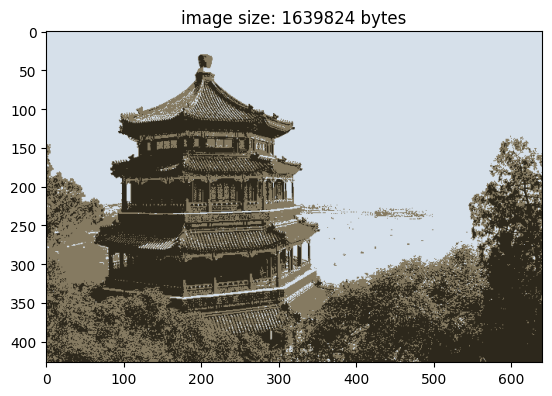

In [163]:
plt.title(f'image size: {getsizeof(image)} bytes')
plt.imshow(cimage)

### Probem: It seems like refrencing doesn't work as it is supposed to.